# Import Libraries

In [251]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Data Preparation

In [3]:
data = pd.read_csv('student-mat.csv')

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
len(data)

395

In [9]:
df = data.iloc[:,-3:]
df.head()

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10


In [37]:
def grade(grade_points):
    if grade_points >= 9.0 and grade_points <= 10.0:
        return "O"
    elif grade_points >= 8.0 and grade_points <= 8.9:
        return "D+"
    elif grade_points >= 7.5 and grade_points <= 7.9:
        return "D"
    elif grade_points >= 7.0 and grade_points <= 7.4:
        return "A+"
    elif grade_points >= 6.0 and grade_points <= 6.9:
        return "A"
    elif grade_points >= 5.0 and grade_points <= 5.9:
        return "B"
    elif grade_points >= 4.0 and grade_points <= 4.9:
        return "C"
    elif grade_points >= 0.1 and grade_points <= 3.9:
        return "RA"
    elif grade_points == 0.0 and grade_points == 0.0:
        return "AAA"

In [41]:
lists = []
for index, row in df.iterrows():
    yr_1 = row[0]/2
    yr_2 = row[1]/2
    yr_3 = row[2]/2
    letter_grade_yr_1 = grade(yr_1)
    letter_grade_yr_2 = grade(yr_2)    
    letter_grade_yr_3 = grade(yr_3)
    lists.append([letter_grade_yr_3,letter_grade_yr_3,letter_grade_yr_3])
new_df = pd.DataFrame(lists, columns = ['year_1','year_2','year_3'])
new_df.head()
len(new_df)

395

In [49]:
new_df.head()

,year_1,year_2,year_3
0,RA,RA,RA
1,RA,RA,RA
2,B,B,B
3,D,D,D
4,B,B,B


In [45]:
def shuffle_years(year):
    return new_df[year].sample(frac=1)

In [72]:
new_df.year_2[0]

'RA'

In [92]:
def append_data_once(year,newly_created_data):
    shuffle_list_1 = []
    shuffle_list_2 = []
    shuffle_list_3 = []
    shuffled_year = shuffle_years(year)

    j = 0
    if year == 'year_1':
        for i in shuffled_year:
            shuffle_list_1.append(i)
            shuffle_list_2.append(new_df.year_2[j])
            shuffle_list_3.append(new_df.year_3[j])
            j += 1
    elif year == 'year_2':
        for i in shuffled_year:
            shuffle_list_1.append(new_df.year_1[j])
            shuffle_list_2.append(i)
            shuffle_list_3.append(new_df.year_3[j])
            j += 1
    elif year == 'year_3':
        for i in shuffled_year:
            shuffle_list_1.append(new_df.year_1[j])
            shuffle_list_2.append(new_df.year_2[j])
            shuffle_list_3.append(i)
            j += 1

    years_dict = {'year_1': shuffle_list_1,'year_2': shuffle_list_2, 'year_3': shuffle_list_3}
    append_df = pd.DataFrame(years_dict, columns=['year_1','year_2','year_3'])
    return pd.concat([newly_created_data,append_df],ignore_index = True, axis = 0)

In [103]:
def append_data_twice(year1,year2,newly_created_data):
    shuffle_list_1 = []
    shuffle_list_2 = []
    shuffle_list_3 = []
    shuffled_year1 = shuffle_years(year1)
    shuffled_year2 = shuffle_years(year2)

    k = 0
    if year1 == 'year_1' and year2 == 'year_2':
        for (i,j) in zip(shuffled_year1,shuffled_year2):
            shuffle_list_1.append(i)
            shuffle_list_2.append(j)
            shuffle_list_3.append(new_df.year_3[k])
            k += 1
    elif year1 == 'year_1' and year2 == 'year_3':
        for (i,j) in zip(shuffled_year1,shuffled_year2):
            shuffle_list_1.append(i)
            shuffle_list_2.append(new_df.year_2[k])
            shuffle_list_3.append(j)
            k += 1
    elif year1 == 'year_2' and year2 == 'year_3':
        for (i,j) in zip(shuffled_year1,shuffled_year2):
            shuffle_list_1.append(new_df.year_1[k])
            shuffle_list_2.append(i)
            shuffle_list_3.append(j)
            k += 1
    elif year1 == 'year_2' and year2 == 'year_1':
        for (i,j) in zip(shuffled_year1,shuffled_year2):
            shuffle_list_1.append(i)
            shuffle_list_2.append(j)
            shuffle_list_3.append(new_df.year_3[k])
            k += 1
    elif year1 == 'year_3' and year2 == 'year_2':
        for (i,j) in zip(shuffled_year1,shuffled_year2):
            shuffle_list_1.append(new_df.year_1[k])
            shuffle_list_2.append(i)
            shuffle_list_3.append(j)
            k += 1
    elif year1 == 'year_3' and year2 == 'year_1':
        for (i,j) in zip(shuffled_year1,shuffled_year2):
            shuffle_list_1.append(i)
            shuffle_list_2.append(new_df.year_2[k])
            shuffle_list_3.append(j)
            k += 1

    years_dict = {'year_1': shuffle_list_1,'year_2': shuffle_list_2, 'year_3': shuffle_list_3}
    append_df = pd.DataFrame(years_dict, columns=['year_1','year_2','year_3'])
    return pd.concat([newly_created_data,append_df],ignore_index = True, axis = 0)

In [114]:
def shuffle_all(year1,year2,year3,newly_created_data):
    shuffle_list_1 = []
    shuffle_list_2 = []
    shuffle_list_3 = []
    shuffled_year1 = shuffle_years(year1)
    shuffled_year2 = shuffle_years(year2)
    shuffled_year3 = shuffle_years(year3)
    
    for (i,j,k) in zip(shuffled_year1,shuffled_year2,shuffled_year3):
        shuffle_list_1.append(i)
        shuffle_list_2.append(j)
        shuffle_list_3.append(k)
    
    years_dict = {'year_1': shuffle_list_1,'year_2': shuffle_list_2, 'year_3': shuffle_list_3}
    append_df = pd.DataFrame(years_dict, columns=['year_1','year_2','year_3'])
    return pd.concat([newly_created_data,append_df],ignore_index = True, axis = 0)

In [97]:
append_year_1 = append_data_once('year_1',new_df)

In [98]:
append_year_2 = append_data_once('year_2',append_year_1)

In [100]:
append_year_3 = append_data_once('year_3',append_year_2)

In [105]:
year_12 = append_data_twice('year_1','year_2',append_year_3)

In [107]:
year_13 = append_data_twice('year_1','year_3',year_12)

In [108]:
year_23 = append_data_twice('year_2','year_3',year_13)

In [109]:
year_21 = append_data_twice('year_2','year_1',year_23)

In [110]:
year_32 = append_data_twice('year_3','year_1',year_21)

In [111]:
year_31 = append_data_twice('year_3','year_1',year_32)

In [116]:
final_data = shuffle_all('year_1','year_2','year_3',year_31)
final_data.tail()

,year_1,year_2,year_3
4340,A+,AAA,A
4341,RA,O,C
4342,C,B,C
4343,RA,A,RA
4344,AAA,C,B


In [118]:
final_data.isnull().sum()

year_1    0
year_2    0
year_3    0
dtype: int64

In [120]:
len(final_data)

4345

In [257]:
final_data.to_csv('students.csv')

# Data Visualization

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

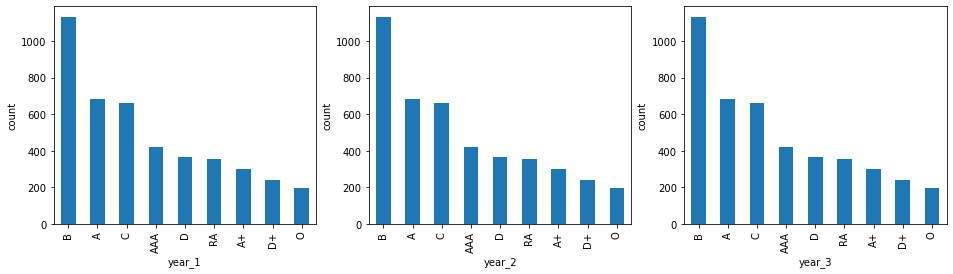

In [129]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
final_data.groupby(['year_1'])['year_1'].count().sort_values(ascending=False).plot.bar()
plt.ylabel('count')
plt.subplot(1,3,2)
final_data.groupby(['year_2'])['year_2'].count().sort_values(ascending=False).plot.bar()
plt.ylabel('count')
plt.subplot(1,3,3)
final_data.groupby(['year_3'])['year_3'].count().sort_values(ascending=False).plot.bar()
plt.ylabel('count')
plt.tight_layout

In [152]:
print(final_data['year_1'].value_counts())

B      1133
A       682
C       660
AAA     418
D       363
RA      352
A+      297
D+      242
O       198
Name: year_1, dtype: int64


In [149]:
print(final_data.year_1.unique())

['RA' 'B' 'D' 'O' 'C' 'A' 'A+' 'D+' 'AAA']


In [157]:
labels = ['RA', 'B', 'D', 'O', 'C', 'A', 'A+', 'D+', 'AAA']
sizes = [352,1133,363,198,660,682,297,242,418]
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0)

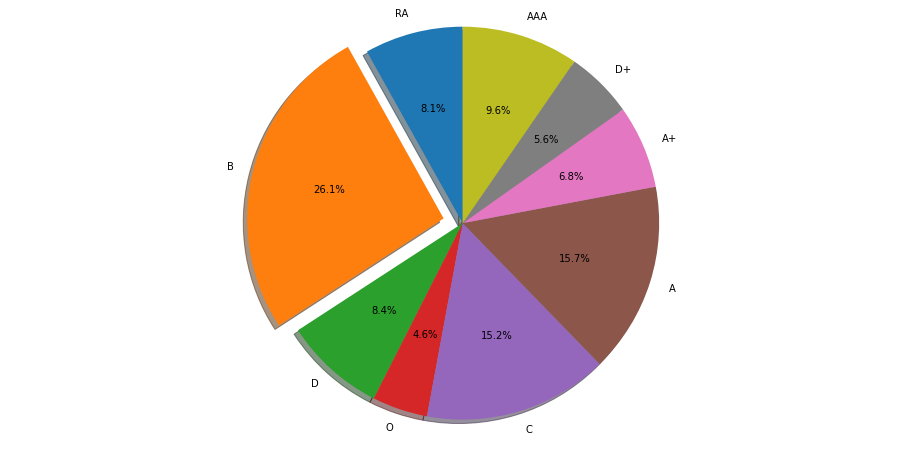

In [161]:
fig1, ax1 = plt.subplots(figsize= (16,8))

ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Feature Engineering

In [162]:
final_data.head()

,year_1,year_2,year_3
0,RA,RA,RA
1,RA,RA,RA
2,B,B,B
3,D,D,D
4,B,B,B


In [163]:
len(final_data)

4345

In [168]:
X = final_data.iloc[:,0:2]
y = final_data.iloc[:,-1:]

In [169]:
X.head()

,year_1,year_2
0,RA,RA
1,RA,RA
2,B,B
3,D,D
4,B,B


In [170]:
y.head()

,year_3
0,RA
1,RA
2,B
3,D
4,B


In [171]:
print(len(X),len(y))

4345 4345


In [176]:
X.year_1.value_counts().sort_values(ascending=False)

B      1133
A       682
C       660
AAA     418
D       363
RA      352
A+      297
D+      242
O       198
Name: year_1, dtype: int64

In [178]:
X_encoded = pd.get_dummies(X,columns=['year_1','year_2'])
X_encoded.head()

,year_1_A,year_1_A+,year_1_AAA,year_1_B,year_1_C,year_1_D,year_1_D+,year_1_O,year_1_RA,year_2_A,year_2_A+,year_2_AAA,year_2_B,year_2_C,year_2_D,year_2_D+,year_2_O,year_2_RA
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [180]:
y.year_3.unique()

array(['RA', 'B', 'D', 'O', 'C', 'A', 'A+', 'D+', 'AAA'], dtype=object)

In [181]:
switcher = { "O": 1, "D+": 2, "D": 3, "A+": 4, "A": 5, "B": 6, "C": 7, "RA": 8, "AAA": 9}

In [182]:
y_encoded = y.replace({"year_3": switcher})

In [188]:
y_encoded.head()

,year_3
0,8
1,8
2,6
3,3
4,6


# Basic Decision Tree Classification

In [207]:
X_train,x_test,y_train,y_test = train_test_split(X_encoded, y_encoded,random_state =42)

In [208]:
classifier = DecisionTreeClassifier(criterion='gini',random_state=42)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(x_test)

In [209]:
print('Accuracy : ',metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.32750689972401104


Confusion Matrix


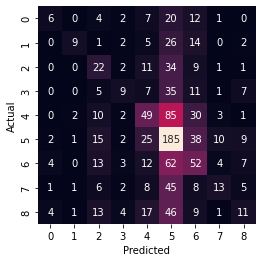

In [210]:
print('Confusion Matrix')
mat = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Advanced Decision Tree Classification

In [212]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train,y_train)

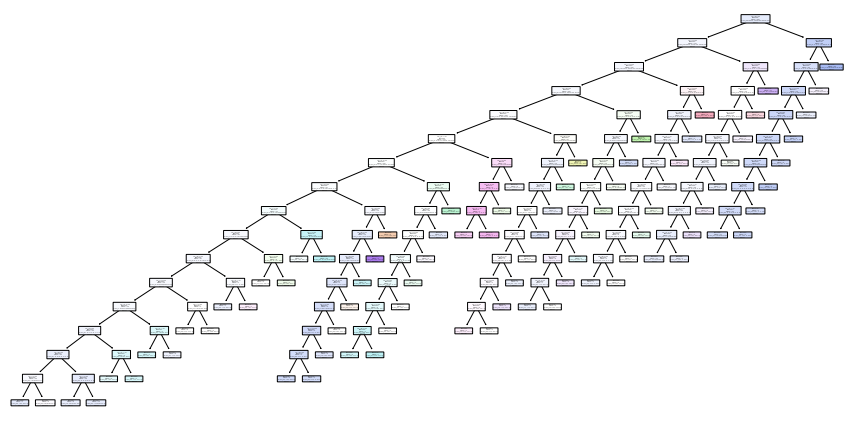

In [213]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True,class_names=['RA', 'B', 'D', 'O', 'C', 'A', 'A+', 'D+', 'AAA'],feature_names=X_encoded.columns);

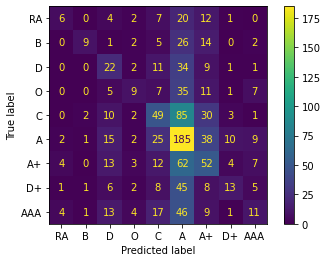

In [195]:
plot_confusion_matrix(clf_dt,x_test,y_test,display_labels=['RA', 'B', 'D', 'O', 'C', 'A', 'A+', 'D+', 'AAA'])

## Cost Complexity Pruning Part 1: Visualize alpha

In [196]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train) # it determines the value for alpha
ccp_alphas = path.ccp_alphas  # extract different values for alpha
ccp_alphas = ccp_alphas[:-1]  # exclude the maximum value for alpha

clf_dts = []    # create an array that we will put decision trees

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)

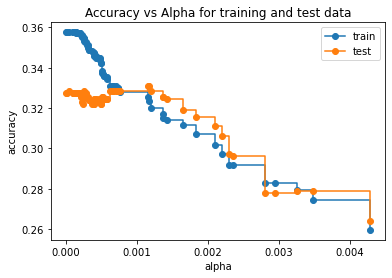

In [197]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(x_test,y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for training and test data")
ax.plot(ccp_alphas,train_scores,marker = "o",label = "train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker = "o",label = "test",drawstyle="steps-post")
ax.legend()
plt.show()

## Cost Complexity Pruning Part 2 : Cross Validation For Finding the Best Alpha

<AxesSubplot:xlabel='tree'>

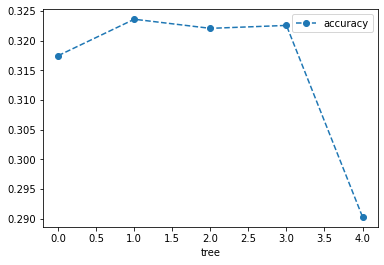

In [198]:
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.0005)

scores = cross_val_score(clf_dt,X_train,y_train,cv = 5)
df = pd.DataFrame(data={'tree' : range(5),'accuracy' : scores})

df.plot(x = 'tree', y = 'accuracy', marker ='o',linestyle = '--')

<AxesSubplot:xlabel='alpha'>

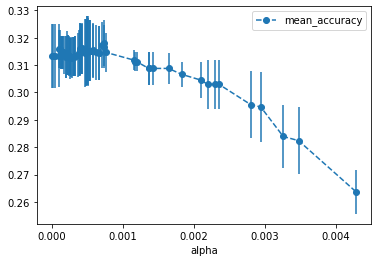

In [199]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt,X_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values,columns = ['alpha','mean_accuracy','std'])

alpha_results.plot(x = 'alpha',y = 'mean_accuracy',yerr='std',marker = 'o',linestyle = '--')

In [217]:
alpha_results[(alpha_results['alpha'] > 0.0003) & (alpha_results['alpha'] < 0.0004)]

,alpha,mean_accuracy,std
26,0.000306,0.313073,0.007104
27,0.000316,0.313073,0.007104
28,0.000324,0.313380,0.007254
29,0.000333,0.313380,0.007254
30,0.000373,0.313686,0.008214
31,0.000379,0.314300,0.008415
32,0.000393,0.314607,0.008625
33,0.000396,0.315834,0.009453
34,0.000399,0.315834,0.009453


In [222]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.00015) & (alpha_results['alpha'] < 0.00017)]['alpha']
ideal_ccp_alpha

11    0.000164
Name: alpha, dtype: float64

In [223]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.0001636996112134234

## Building,Evaluating,Drawing and Interpreting the Final Classification Tree

In [224]:
clf_dt_pruned = DecisionTreeClassifier(random_state = 42,ccp_alpha = ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train,y_train)

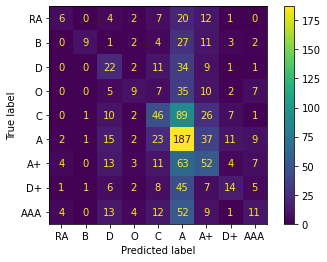

In [225]:
plot_confusion_matrix(clf_dt_pruned,x_test,y_test,display_labels=['RA', 'B', 'D', 'O', 'C', 'A', 'A+', 'D+', 'AAA'])

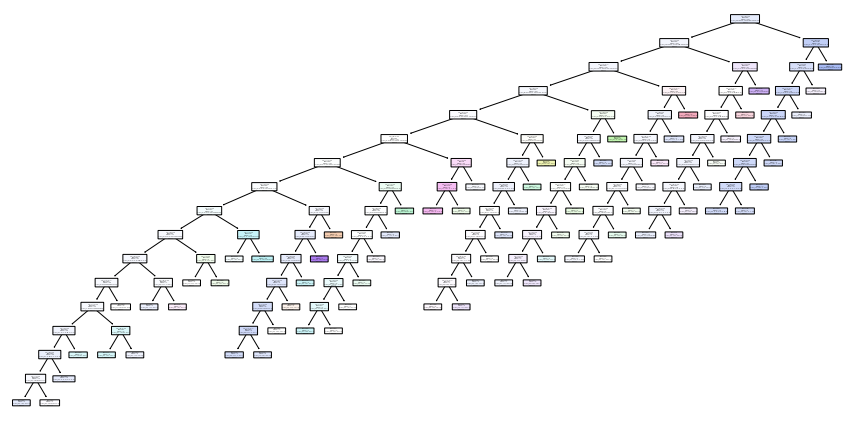

In [226]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=['RA', 'B', 'D', 'O', 'C', 'A', 'A+', 'D+', 'AAA'],feature_names=X_encoded.columns);

In [252]:
# save the model to disk
filename = 'finalized_grade_prediction.pkl'
pkl.dump(clf_dt_pruned, open(filename, 'wb'))

In [253]:
#load the model from disk
filename = 'finalized_grade_prediction.pkl'
classifier = pkl.load(open(filename, 'rb'))

# Manual Testing

In [235]:
x_test.iloc[:1,:]

,year_1_A,year_1_A+,year_1_AAA,year_1_B,year_1_C,year_1_D,year_1_D+,year_1_O,year_1_RA,year_2_A,year_2_A+,year_2_AAA,year_2_B,year_2_C,year_2_D,year_2_D+,year_2_O,year_2_RA
2860,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [236]:
x_test.columns

Index(['year_1_A', 'year_1_A+', 'year_1_AAA', 'year_1_B', 'year_1_C',
       'year_1_D', 'year_1_D+', 'year_1_O', 'year_1_RA', 'year_2_A',
       'year_2_A+', 'year_2_AAA', 'year_2_B', 'year_2_C', 'year_2_D',
       'year_2_D+', 'year_2_O', 'year_2_RA'],
      dtype='object')

In [246]:
manual_test = pd.DataFrame({'year_1_A': [0], 'year_1_A+': [0], 'year_1_AAA': [0], 'year_1_B': [0], 'year_1_C': [0],
       'year_1_D': [0], 'year_1_D+': [0], 'year_1_O': [1], 'year_1_RA': [0], 'year_2_A': [0],
       'year_2_A+': [1], 'year_2_AAA': [0], 'year_2_B': [0], 'year_2_C': [0], 'year_2_D': [0],
       'year_2_D+': [0], 'year_2_O': [0], 'year_2_RA': [0]},columns=['year_1_A', 'year_1_A+', 'year_1_AAA', 'year_1_B', 'year_1_C',
       'year_1_D', 'year_1_D+', 'year_1_O', 'year_1_RA', 'year_2_A',
       'year_2_A+', 'year_2_AAA', 'year_2_B', 'year_2_C', 'year_2_D',
       'year_2_D+', 'year_2_O', 'year_2_RA'])
manual_test.head()

,year_1_A,year_1_A+,year_1_AAA,year_1_B,year_1_C,year_1_D,year_1_D+,year_1_O,year_1_RA,year_2_A,year_2_A+,year_2_AAA,year_2_B,year_2_C,year_2_D,year_2_D+,year_2_O,year_2_RA
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [254]:
prediction = clf_dt_pruned.predict(manual_test)
prediction

array([1], dtype=int64)

In [255]:
switcher_reverse = {1: 'O',2: 'D+',3: 'D',4: 'A+',5: 'A',6: 'B',7: 'C',8: 'RA',9: 'AAA'}

In [256]:
print(switcher_reverse.get(int(prediction)))

O
